### Name : Shobhit Mirjankar
### Batch : C32
### Roll No : 1902101

In [52]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
np.set_printoptions(suppress=True)
from scipy import stats
pd.options.display.float_format = '{:.3f}'.format
from sklearn.metrics import r2_score
np.set_printoptions(threshold=3)

In [53]:
# Displaying the Dataset

dataset = pd.read_csv('cars.csv')
dataset

,year_bought,km_driven,transmission,owner,selling_price
0,2007,70000,Manual,First Owner,60000
1,2007,50000,Manual,First Owner,135000
2,2012,100000,Manual,First Owner,600000
3,2017,46000,Manual,First Owner,250000
4,2014,141000,Manual,Second Owner,450000
...,...,...,...,...,...
4335,2014,80000,Manual,Second Owner,409999
4336,2014,80000,Manual,Second Owner,409999
4337,2009,83000,Manual,Second Owner,110000
4338,2016,90000,Manual,First Owner,865000


In [54]:
# Data Analysis

print(dataset['transmission'].unique())
print(dataset['owner'].unique())

['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [55]:
# Data Preprocessing

le = LabelEncoder()
dataset['transmission'] = le.fit_transform(dataset['transmission'])

oe = OrdinalEncoder(categories=[['Test Drive Car','First Owner','Second Owner',
                                 'Third Owner','Fourth & Above Owner']],dtype=int)
dataset[['owner']] = oe.fit_transform(dataset[['owner']])
dataset

,year_bought,km_driven,transmission,owner,selling_price
0,2007,70000,1,1,60000
1,2007,50000,1,1,135000
2,2012,100000,1,1,600000
3,2017,46000,1,1,250000
4,2014,141000,1,2,450000
...,...,...,...,...,...
4335,2014,80000,1,2,409999
4336,2014,80000,1,2,409999
4337,2009,83000,1,2,110000
4338,2016,90000,1,1,865000


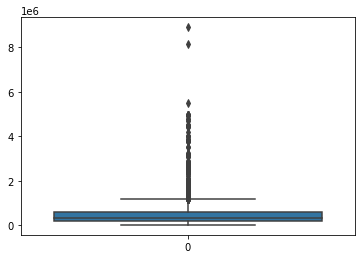

Outlier Indexes : [  89   96  101 ... 4224 4304 4313]


In [56]:
# Outlier Removal

sns.boxplot(data = dataset['selling_price'])
plt.show()
z = np.abs(stats.zscore(dataset['selling_price']))
outliers = np.where(z>3)[0]
print('Outlier Indexes :',outliers)
dataset.drop(outliers,inplace = True)

In [57]:
X = dataset[['year_bought','km_driven','transmission','owner']]
y = dataset['selling_price']
X.insert(0, 'x0', 1)
X

,x0,year_bought,km_driven,transmission,owner
0,1,2007,70000,1,1
1,1,2007,50000,1,1
2,1,2012,100000,1,1
3,1,2017,46000,1,1
4,1,2014,141000,1,2
...,...,...,...,...,...
4335,1,2014,80000,1,2
4336,1,2014,80000,1,2
4337,1,2009,83000,1,2
4338,1,2016,90000,1,1


In [58]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4248, dtype: int64

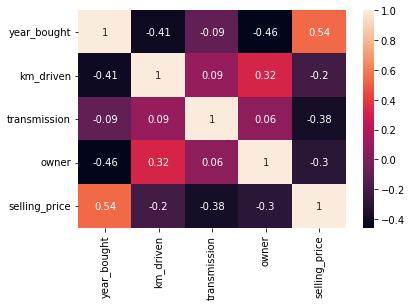

In [59]:
# Feature Importance

correl_matrix = dataset.corr().round(2)
sns.heatmap(data=correl_matrix, annot=True)
plt.show()

In [60]:
# Split dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=13)
X_train

,x0,year_bought,km_driven,transmission,owner
2888,1,2015,29000,1,1
589,1,2017,46507,1,1
706,1,2012,100000,1,3
692,1,2015,90000,1,3
203,1,2014,40000,1,2
...,...,...,...,...,...
158,1,2020,120000,1,1
890,1,2018,10500,1,1
2863,1,2018,30000,1,1
74,1,2009,120000,1,3


## Multiple Linear Regression - Analytical Method 

In [61]:
X_train = X_train.values
print('X :')
print(X_train)
print()
print('Dimensions : ',X_train.shape)

X :
[[     1   2015  29000      1      1]
 [     1   2017  46507      1      1]
 [     1   2012 100000      1      3]
 ...
 [     1   2018  30000      1      1]
 [     1   2009 120000      1      3]
 [     1   2018  20000      1      1]]

Dimensions :  (3398, 5)


In [62]:
y_train = y_train.values.reshape(len(y_train),1)
print('Y :')
print(y_train)
print()
print('Dimensions : ',y_train.shape)

Y :
[[ 434999]
 [ 600000]
 [ 180000]
 ...
 [ 550000]
 [ 500000]
 [1100000]]

Dimensions :  (3398, 1)


In [63]:
# Calculate parameter vector theta

def calculate_theta(X,y):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),
           X.T),y)

theta = calculate_theta(X_train,y_train)
print('Parameters of MLR model : ')
print(theta)

Parameters of MLR model : 
[[-77216062.20875642]
 [    38768.51718162]
 [        0.36177677]
 [  -405901.59668052]
 [   -27968.17415285]]


In [64]:
# Predict on Test Set

def predict(theta,X):
    return np.matmul(X,theta)
    
y_pred = predict(theta,X_test.values)
print('Predicted Selling Prices : ')
print(y_pred)

Predicted Selling Prices : 
[[118878.57013942]
 [382994.21528248]
 [590362.34443304]
 ...
 [181109.61720574]
 [924187.20349936]
 [555211.59492454]]


In [65]:
results = pd.DataFrame({'Actual':y_test,'Predicted':y_pred.flatten()})
results

,Actual,Predicted
3040,500000,118878.570
3195,377000,382994.215
2063,650000,590362.344
3270,265000,449759.346
3152,350000,954839.259
...,...,...
1317,320000,367769.628
2931,325000,861087.595
1438,160000,181109.617
711,1199000,924187.203


In [66]:
X_ip = [1] + list(map(int,input("Enter year_bought, km_driven, transmission, owner : ").split()))[:4]
X_ip = np.array(X_ip).reshape(1,len(X_ip))
print('Predicted Selling Price of car is : ',predict(theta,X_ip)[0][0])

Enter year_bought, km_driven, transmission, owner : 2015 45000 1 1
Predicted Selling Price of car is :  484910.0959075366


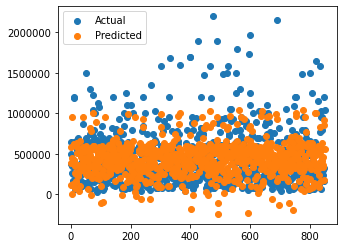

In [67]:
# Multiple Linear Regression - Actual vs Predicted

plt.figure(figsize=(5, 4))
ax = plt.axes()
ax.scatter(range(len(y_test)),y_test)
ax.scatter(range(len(y_test)),y_pred)
ax.ticklabel_format(style='plain')
plt.legend(['Actual','Predicted'])
plt.show()

In [68]:
# Evaluate Model

print('R2 Score on train set : ',r2_score(y_train,
                                 predict(theta,X_train).flatten()))
print('R2 Score on test set : ',r2_score(y_test,y_pred))

R2 Score on train set :  0.4099448329483292
R2 Score on test set :  0.4007013048558429


Interpretation of Results : 'year_bought' is the most important feature to predict selling price of the car as it has highest correlation of 0.54 with 'selling_price' followed by 'transmission' which has -0.38 correlation with 'selling_price'